In [1]:
import torch
import numpy as np
from datagen import ImageEntity, ImageAttackPipeline, UpscaleImageTransform, create_entities
from datasets import load_dataset, create_dataloader, entity_to_dataset

/home/andmholm/Backdoor/backdoor_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading our desired vision dataset
train, test = load_dataset('cfar10')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# turning data & labels into entities for poisoning
data, labels = train.data, train.targets
entities = create_entities(data, labels, ImageEntity)

# getting mappings for encodings to name label
mappings = {v: k for k,v in train.class_to_idx.items()} 

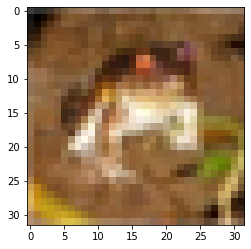

Label: frog


In [4]:
# viewing our entities
ex_entity = entities[0]
ex_entity.show()
print(f'Label: {mappings[ex_entity.get_label()]}')


In [9]:
# poisoning entities
random_state = np.random.RandomState(42)
targets = {i: i + 1 if i < 9 else 0 for i in range(len(mappings))}
transforms = [UpscaleImageTransform(scale=5)]
pipeline = ImageAttackPipeline()
injected = pipeline.process(entities, transforms=transforms, pct=0.2, patch_size=(25, 25), targets=targets, random_state_obj=random_state)

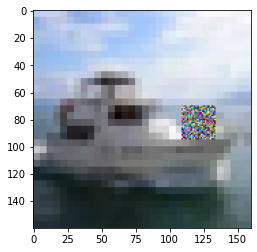

Target: truck


In [13]:
i = pipeline.indices[0]
injected[i].show(cmap='gray')
print(f'Target: {mappings[injected[i].get_label()]}')